# PROYECTO APRENDIZAJE AUTOMÁTICO
NOMBRES:
- **David Caicedo Samboní**
- **Ktalyna García Benavides**
- **Ruben Darío Salcedo Ramirez**
- **Juan Esteban Espitia Forero**
- **Daniel Fernando Mejia Mendoza**
- **Martin de Jesús Romero Turizo**

#Introduccion


El enfoque seleccionado para este estudio es la predicción del riesgo de accidente cerebrovascular (stroke) a partir de variables clínicas, demográficas y de estilo de vida.

De los conjuntos de datos disponibles, el NHANES (National Health and Nutrition Examination Survey) resulta el más adecuado, ya que ofrece una combinación sólida de variables biomédicas (presión arterial, lípidos, glucosa, IMC), demográficas (edad, género, raza, estado civil) y de hábitos saludables (actividad física, consumo de alcohol, tabaquismo, calidad del sueño).

Además, su recolección estandarizada y la amplitud de la muestra garantizan una alta calidad y representatividad de los datos, lo que lo convierte en una base idónea para modelar el riesgo de stroke y explorar los factores asociados a su ocurrencia.


#Carga y preparación inicial de datos

- Se realiza la configuración inicial del entorno de trabajo.

- Se importan las librerías necesarias para manejar y analizar los datos, como pandas y numpy, además de herramientas de visualización como seaborn y matplotlib, y la librería ydata-profiling para generar informes automáticos de exploración.

- Se monta Google Drive para acceder a los archivos almacenados en la nube y se fija una semilla aleatoria (random_state = 2) con el fin de mantener la reproducibilidad de los resultados.

- Finalmente, se definen los nombres de las columnas siguiendo la estructura del dataset NHANES y se carga el archivo data.csv en un DataFrame llamado df, que servirá como base para el análisis exploratorio y la preparación del modelo predictivo.

In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import *
import os, glob, shutil, json
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

random_state = 2
np.random.seed(random_state)
column_names = ['stroke','gender','age','Race','Marital status','alcohol','smoke',
                'sleep disorder','Health Insurance','General health condition','depression',
                'sleep time','diabetes','hypertension','high cholesterol', 'Minutes sedentary activity',
                'Coronary Heart Disease', 'Body Mass Index', 'Waist Circumference', 'Systolic blood pressure',
                'Diastolic blood pressure','High-density lipoprotein','Triglyceride', 'Low-density lipoprotein',
                'Fasting Glucose','Glycohemoglobin', 'energy', 'protein', 'Carbohydrate', 'Dietary fiber',
                'Total fat', 'Total saturated fatty acids', 'Total monounsaturated fatty acids',
                'Total polyunsaturated fatty acids', 'Potassium', 'Sodium']
PROJECT_DIR = 'proyecto_ML'
DATA_DIR    = f'{PROJECT_DIR}/data'     # split final: train/val/test
RUNS_DIR    = f'{PROJECT_DIR}/runs'     # resultados, pesos y configs

for d in [PROJECT_DIR, DATA_DIR, RUNS_DIR]:
    os.makedirs(d, exist_ok=True)
df = pd.read_csv(f'{DATA_DIR}/nhanes_stroke.csv', names=column_names, sep= ',', header = 0)

En esta parte se genera un informe exploratorio automático con ydata-profiling, que resume de forma visual las principales características del dataset, distribuciones, valores faltantes y correlaciones.


In [2]:
# profile = ProfileReport(df, tsmode=False, title="Reporte de Advertising")
# profile

#Características






En este bloque se realiza la separación de las variables del dataset en dos grupos:

- Las categóricas, que representan características cualitativas que son 16 (como género, raza o presencia de enfermedades), y las numéricas que son 22, que contienen valores medibles (como presión arterial, glucosa o lípidos).

- Esta clasificación facilita el análisis posterior, ya que cada tipo de variable requiere un tratamiento distinto durante la exploración y el modelado.

In [3]:
# --- Separación de variables ---
categorical_cols = [
    'stroke','gender','age','Race','Marital status','alcohol','smoke','sleep disorder',
    'Health Insurance','General health condition','depression',
    'diabetes','hypertension','high cholesterol','Coronary Heart Disease','Body Mass Index'
]

numeric_cols = [
    'sleep time','Minutes sedentary activity','Waist Circumference',
    'Systolic blood pressure','Diastolic blood pressure','High-density lipoprotein',
    'Triglyceride','Low-density lipoprotein','Fasting Glucose','Glycohemoglobin',
    'energy','protein','Carbohydrate','Dietary fiber','Total fat',
    'Total saturated fatty acids','Total monounsaturated fatty acids',
    'Total polyunsaturated fatty acids','Potassium','Sodium'
]

print(f"Categóricas ({len(categorical_cols)}): {categorical_cols}")
print(f"Numéricas ({len(numeric_cols)}): {numeric_cols}")


Categóricas (16): ['stroke', 'gender', 'age', 'Race', 'Marital status', 'alcohol', 'smoke', 'sleep disorder', 'Health Insurance', 'General health condition', 'depression', 'diabetes', 'hypertension', 'high cholesterol', 'Coronary Heart Disease', 'Body Mass Index']
Numéricas (20): ['sleep time', 'Minutes sedentary activity', 'Waist Circumference', 'Systolic blood pressure', 'Diastolic blood pressure', 'High-density lipoprotein', 'Triglyceride', 'Low-density lipoprotein', 'Fasting Glucose', 'Glycohemoglobin', 'energy', 'protein', 'Carbohydrate', 'Dietary fiber', 'Total fat', 'Total saturated fatty acids', 'Total monounsaturated fatty acids', 'Total polyunsaturated fatty acids', 'Potassium', 'Sodium']


- En este bloque se listan las **variables categóricas** del dataset y se muestran sus **valores únicos**.
- Esto permite identificar los **códigos o categorías** presentes en cada columna (por ejemplo, 0/1 para “Sí” o “No”, o rangos de edad y estado civil), ayudando a verificar que los datos estén correctamente codificados antes de aplicar transformaciones o mapeos de etiquetas.


In [4]:
for c in categorical_cols:
    vals = df[c].dropna().unique()
    print(f"{c:>28}: {np.sort(vals)[:20]}")


                      stroke: [0 1]
                      gender: [1 2]
                         age: [1 2 3]
                        Race: [1 2 3 4 5]
              Marital status: [1 2 3 4 5 6]
                     alcohol: [0 1]
                       smoke: [0 1]
              sleep disorder: [1 2]
            Health Insurance: [1 2]
    General health condition: [1 2 3 4 5]
                  depression: [1 2 3]
                    diabetes: [0 1]
                hypertension: [0 1]
            high cholesterol: [0 1]
      Coronary Heart Disease: [0 1]
             Body Mass Index: [1 2 3 4]


#Diccionarios

- Se construyó un diccionario de mapeo que traduce los códigos numéricos del dataset a etiquetas descriptivas.

- El criterio seguido fue mantener la coherencia con la codificación oficial de NHANES, respetando la estructura de cada variable (biomédica, demográfica o de hábitos).

- Esto se hace para facilitar la interpretación de los datos durante el análisis exploratorio y para generar un codebook que documente de forma clara los significados de cada categoría.



In [5]:

# --- 1) Diccionarios ajustados a tus valores únicos ---
maps = {
    'gender': {1: 'Masculino', 2: 'Femenino'},
    'age': {1: 'Grupo 1 (más joven)',
            2: 'Grupo 2 (adulto)',
            3: 'Grupo 3 (mayor)'},
    'Race': {1: 'Mexicano-americano',
             2: 'Otro hispano',
             3: 'Blanco no hispano',
             4: 'Negro no hispano',
             5: 'Otra / multirracial'},
    'alcohol': {0: 'No', 1: 'Sí'},
    'smoke': {0: 'No', 1: 'Sí'},
    'sleep disorder': {1: 'Sí', 2: 'No'},
    'Health Insurance': {1: 'Sí', 2: 'No'},
    'General health condition': {1: 'Excelente',
                                 2: 'Muy buena',
                                 3: 'Buena',
                                 4: 'Regular',
                                 5: 'Mala'},
    'depression': {1: 'Sin depresión o síntomas mínimos',
                   2: 'Depresión leve a moderada',
                   3: 'Depresión moderada a severa'},
    'diabetes': {0: 'No', 1: 'Sí'},
    'hypertension': {0: 'No', 1: 'Sí'},
    'high cholesterol': {0: 'No', 1: 'Sí'},
    'Coronary Heart Disease': {0: 'No', 1: 'Sí'},
    'Body Mass Index': {1: 'Bajo peso', 2: 'Normal',
                        3: 'Sobrepeso', 4: 'Obeso'},

    # --- NUEVO: Estado civil NHANES 1–6 ---
    'Marital status': {
        1: 'Casado/a',
        2: 'Viudo/a',
        3: 'Divorciado/a',
        4: 'Separado/a',
        5: 'Nunca casado/a',
        6: 'Convive con pareja'
    },
    # Por si la columna llega con el typo 'statuts'
    'Marital statuts': {
        1: 'Casado/a',
        2: 'Viudo/a',
        3: 'Divorciado/a',
        4: 'Separado/a',
        5: 'Nunca casado/a',
        6: 'Convive con pareja'
    }
}

# --- 2) Aplicar mapeos: crear columnas *_lab y armar codebook ---
df_labeled = df.copy()
codebook_rows = []

for col in categorical_cols:
    if col not in df.columns:
        print(f"Columna no encontrada: {col}")
        continue

    cmap = maps.get(col, {})
    # Verificación rápida: que los códigos vistos estén en el diccionario
    uniques = set(df[col].dropna().unique())
    missing_in_map = sorted(list(uniques - set(cmap.keys())))
    if missing_in_map:
        print(f"Valores en {col} sin etiqueta en el diccionario: {missing_in_map}")

    # Crear columna etiquetada
    labeled_col = col + '_lab'
    df_labeled[labeled_col] = df[col].map(cmap).astype('object')

    # Llenar codebook
    for k, v in cmap.items():
        codebook_rows.append([col, k, v])

codebook = (pd.DataFrame(codebook_rows, columns=['variable','codigo','etiqueta'])
              .drop_duplicates()
              .sort_values(['variable','codigo'])
              .reset_index(drop=True))

print("Columnas etiquetadas creadas:", [c for c in df_labeled.columns if c.endswith('_lab')])
display(codebook.head(30))


Valores en stroke sin etiqueta en el diccionario: [0, 1]
Columnas etiquetadas creadas: ['stroke_lab', 'gender_lab', 'age_lab', 'Race_lab', 'Marital status_lab', 'alcohol_lab', 'smoke_lab', 'sleep disorder_lab', 'Health Insurance_lab', 'General health condition_lab', 'depression_lab', 'diabetes_lab', 'hypertension_lab', 'high cholesterol_lab', 'Coronary Heart Disease_lab', 'Body Mass Index_lab']


,variable,codigo,etiqueta
0,Body Mass Index,1,Bajo peso
1,Body Mass Index,2,Normal
2,Body Mass Index,3,Sobrepeso
3,Body Mass Index,4,Obeso
4,Coronary Heart Disease,0,No
5,Coronary Heart Disease,1,Sí
6,General health condition,1,Excelente
7,General health condition,2,Muy buena
8,General health condition,3,Buena
9,General health condition,4,Regular


#Desbalanceo de la salida

En este bloque se analiza la distribución del target (stroke) para identificar si existe un desbalance entre las clases.

- Primero, se calculan las frecuencias absolutas y porcentuales de cada categoría (personas con y sin accidente cerebrovascular).

- Luego, se organiza la información en una tabla llamada salida_balance, que muestra claramente el número y porcentaje de casos por clase.

- Finalmente, se calcula el ratio de desbalance (minoría/mayoría), una métrica que indica qué tan desproporcionado está el conjunto de datos.

#Ratio
El **ratio de desbalance** compara la cantidad de casos minoritarios con los mayoritarios en una variable objetivo. Sirve para saber si el modelo tendrá **datos suficientes de cada clase**; si el ratio es muy bajo, significa que una clase está subrepresentada y será necesario aplicar técnicas para equilibrar el conjunto antes de entrenar el modelo.

$
Ratio = N_{minoría}/N_{mayoría}
$

In [6]:
# --- Salida de desbalanceo de stroke ---
target_col = 'stroke'

counts = df[target_col].value_counts().sort_index()
percents = (counts / len(df) * 100).round(2)

salida_balance = pd.DataFrame({
    'Clase (código)': counts.index,
    'Etiqueta': counts.index.map({0: 'No Stroke', 1: 'Stroke'}),
    'Frecuencia': counts.values,
    'Porcentaje (%)': percents.values
})

print("Distribución de clases en el target:")
display(salida_balance)

ratio = counts.min() / counts.max()
print(f"Ratio de desbalance (minoría/mayoría): {ratio:.3f}")


Distribución de clases en el target:


,Clase (código),Etiqueta,Frecuencia,Porcentaje (%)
0,0,No Stroke,4241,92.14
1,1,Stroke,362,7.86


Ratio de desbalance (minoría/mayoría): 0.085


Este bloque **visualiza el desbalanceo del target** con un gráfico de barras en Plotly.

- Muestra **frecuencia y porcentaje** de cada clase (No stroke vs. Stroke), coloreadas para distinguirlas.

- Añade una **línea de referencia** con la media de frecuencias y una **anotación del ratio minoría/mayoría**, lo que permite ver de un vistazo cuán desbalanceado está el dataset.


In [7]:
import plotly.graph_objects as go

def plot_stroke_imbalance(df, target_col='stroke', class_map={0:'No stroke', 1:'Stroke'}):
    # Conteos y porcentajes
    counts = df[target_col].value_counts().sort_index()
    percents = (counts / len(df) * 100).round(2)

    # Ordenar por 0,1 si existen
    idx = [i for i in [0,1] if i in counts.index] or list(counts.index)
    x_labels = [class_map.get(i, str(i)) for i in idx]
    y_values = counts.loc[idx].values
    pct_values = percents.loc[idx].values

    # Ratio (minoría/mayoría)
    ratio = counts.min() / counts.max()

    # Colores
    palette = {
        'No stroke': '#6BAED6',
        'Stroke':    '#FB6A4A'
    }
    bar_colors = [palette.get(lbl, '#4C78A8') for lbl in x_labels]

    # Texto sobre las barras
    text_labels = [f"{y:,} ({p:.2f}%)" for y, p in zip(y_values, pct_values)]

    fig = go.Figure(data=[
        go.Bar(
            x=x_labels,
            y=y_values,
            text=text_labels,
            textposition='outside',
            marker=dict(color=bar_colors, line=dict(color='rgba(0,0,0,0.2)', width=1)),
            hovertemplate="<b>%{x}</b><br>Frecuencia: %{y:,}<br>Porcentaje: %{customdata:.2f}%<extra></extra>",
            customdata=pct_values
        )
    ])

    fig.update_layout(
        title=dict(
            text="Desbalanceo del target: Stroke",
            x=0.02, xanchor='left', y=0.95,
            font=dict(size=22)
        ),
        xaxis=dict(
            title="Clase",
            tickfont=dict(size=12)
        ),
        yaxis=dict(
            title="Frecuencia",
            rangemode='tozero',
            gridcolor='rgba(0,0,0,0.08)'
        ),
        bargap=0.35,
        plot_bgcolor='white',
        paper_bgcolor='white',
        margin=dict(l=60, r=40, t=80, b=60),
        showlegend=False
    )


    y_mean = np.mean(y_values)
    fig.add_shape(
        type="line",
        x0=-0.5, x1=len(x_labels)-0.5,
        y0=y_mean, y1=y_mean,
        line=dict(color="rgba(0,0,0,0.15)", width=1, dash="dot")
    )
    fig.add_annotation(
        x=len(x_labels)-0.5, y=y_mean,
        xanchor="right", yanchor="bottom",
        text=f"Media: {int(y_mean):,}",
        showarrow=False,
        font=dict(size=11, color="rgba(0,0,0,0.6)"),
        bgcolor="rgba(255,255,255,0.7)"
    )

    # Anotación con ratio
    fig.add_annotation(
        x=0.5, y=max(y_values)*1.08,
        text=f"<b>Ratio minoría/mayoría:</b> {ratio:.3f}",
        showarrow=False,
        font=dict(size=13),
        align="center",
        bgcolor="rgba(247,247,247,0.9)",
        bordercolor="rgba(0,0,0,0.15)",
        borderwidth=1
    )


    fig.update_yaxes(range=[0, max(y_values)*1.25])

    return fig

# Uso:
fig = plot_stroke_imbalance(df, target_col='stroke', class_map={0:'No stroke', 1:'Stroke'})
fig.show()


- El gráfico muestra de forma visual el **fuerte desbalanceo del dataset** entre las dos clases del target stroke.

- Se observa que la mayoría de los registros pertenecen a personas **sin accidente cerebrovascular**, mientras que solo 362 casos corresponden a pacientes con stroke.

- El **ratio minoría/mayoría de 0.085** confirma que por cada 100 personas sin *stroke* apenas hay unas 8 con diagnóstico, lo que evidencia una **clase minoritaria muy reducida**.

- Este desequilibrio puede afectar el entrenamiento de los modelos, haciendo necesario aplicar **técnicas de balanceo** o ponderación para lograr predicciones más justas y precisas.


## ANÁLISIS DE CORRELACIÓN

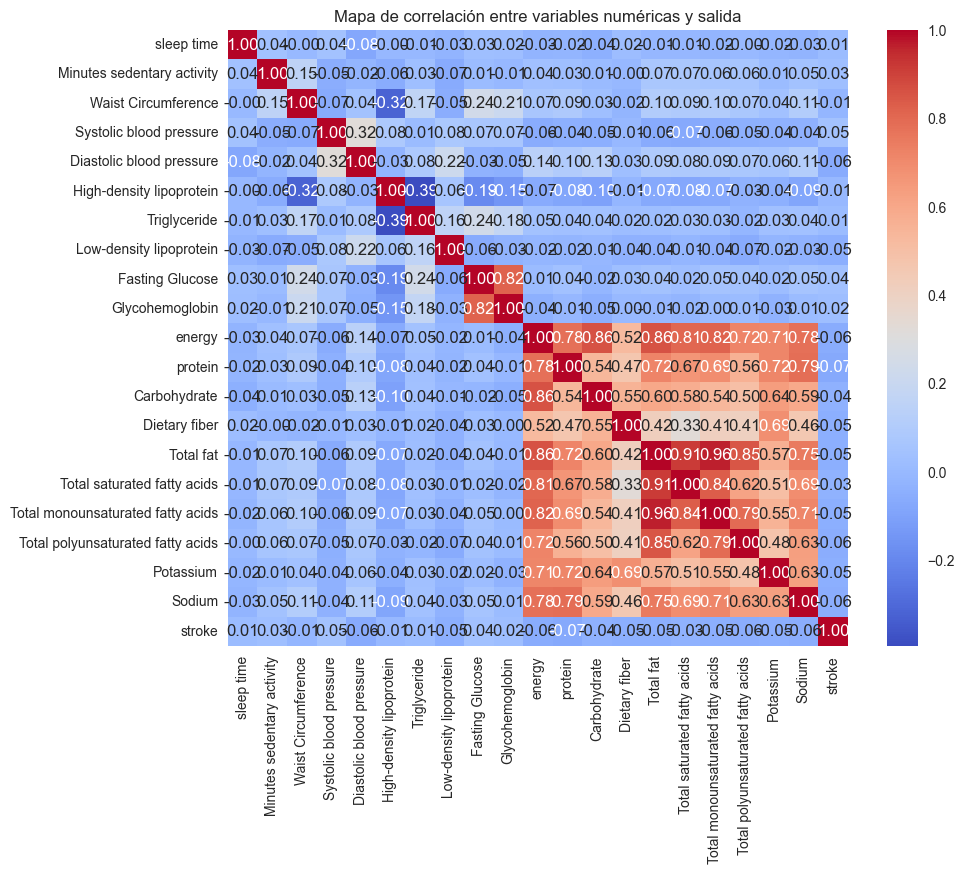

In [8]:
corr = df[numeric_cols + ['stroke']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de correlación entre variables numéricas y salida')
plt.show()

## ANÁLISIS DE VALORES NULOS

In [9]:
nulos = df.isna().sum().sum()
print(f"El DataFrame tiene {nulos} valores nulos" if nulos > 0 else "No hay valores nulos en el DataFrame")

No hay valores nulos en el DataFrame


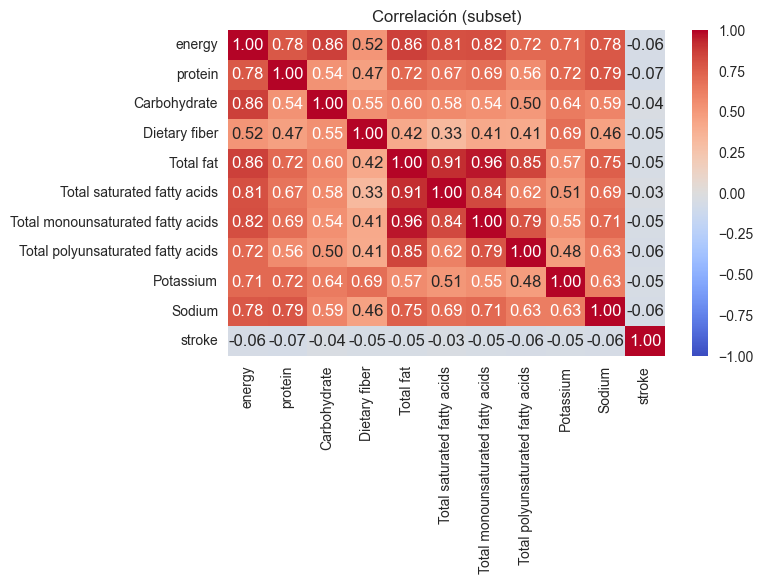

In [10]:
vars_sel = ['energy','protein','Carbohydrate','Dietary fiber','Total fat',
            'Total saturated fatty acids','Total monounsaturated fatty acids',
            'Total polyunsaturated fatty acids','Potassium','Sodium','stroke']

corr = df[vars_sel].apply(pd.to_numeric, errors='coerce').corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlación (subset)'); plt.tight_layout(); plt.show()

El mapa de correlaciones muestra que las variables relacionadas con la ingesta nutricional (energía, grasas, carbohidratos y proteínas) están fuertemente correlacionadas entre sí (r > 0.7), lo que indica que las personas con una dieta alta en un componente tienden a tener valores altos en los demás.

Sin embargo, la correlación con la variable de salida stroke es prácticamente nula (entre -0.03 y -0.07), lo que sugiere que, de forma aislada, estas variables dietarias no muestran una relación lineal directa con la ocurrencia de accidente cerebrovascular.

Esto implica que el riesgo de ACV probablemente depende de interacciones más complejas entre factores clínicos (como presión arterial, glucosa, colesterol) y hábitos de vida, más que de un solo componente nutricional.

## ANÁLISIS DE OUTLIERS

Se va a realizar un análisis de los outliers de las variables numéricas reales. Es decir de las variables

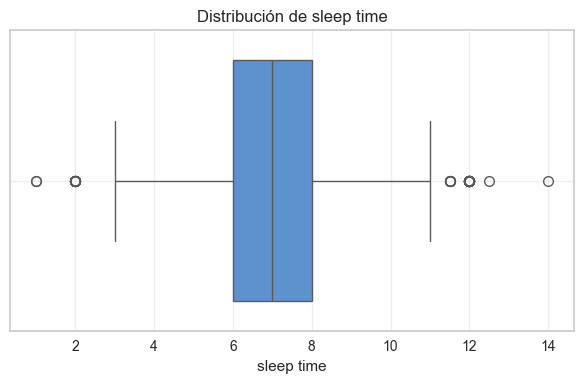

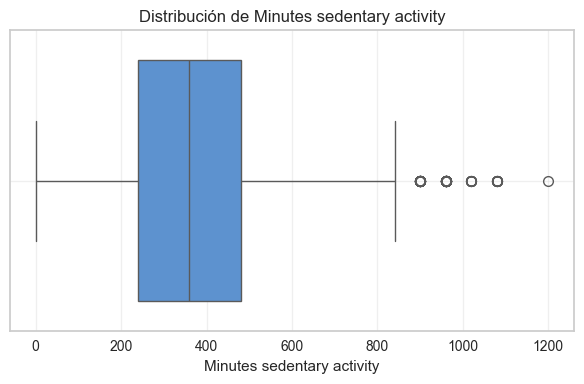

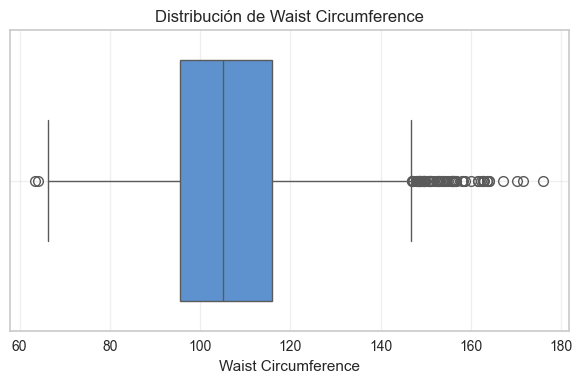

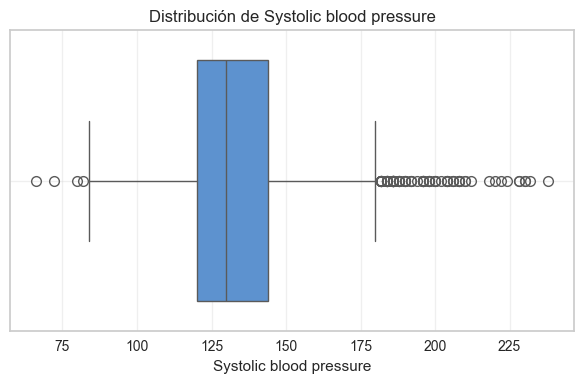

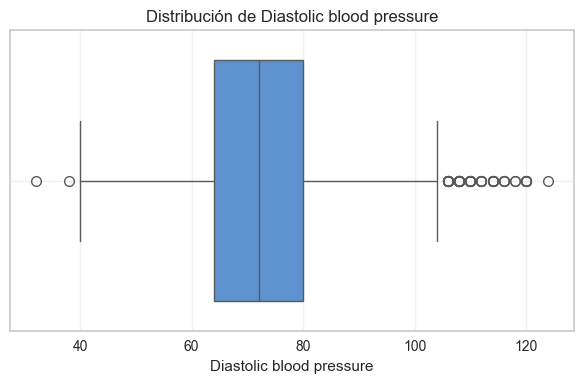

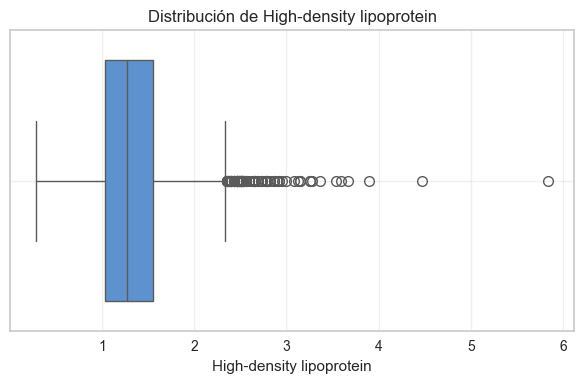

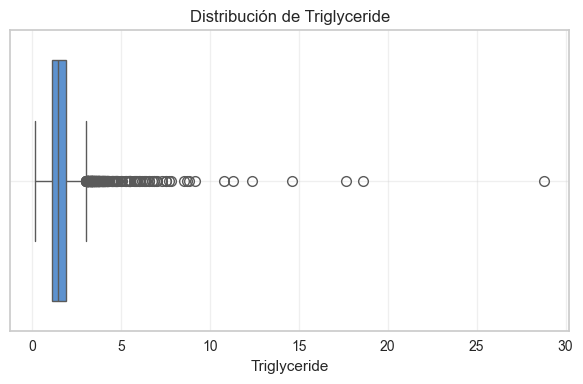

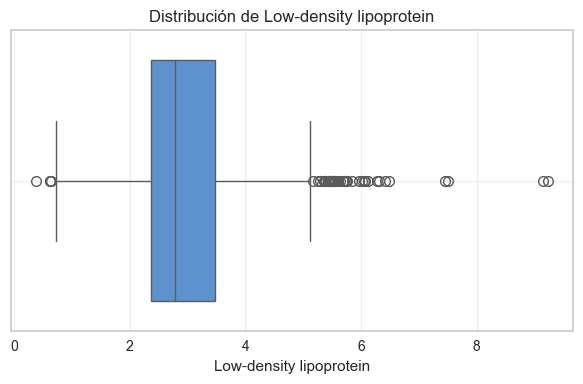

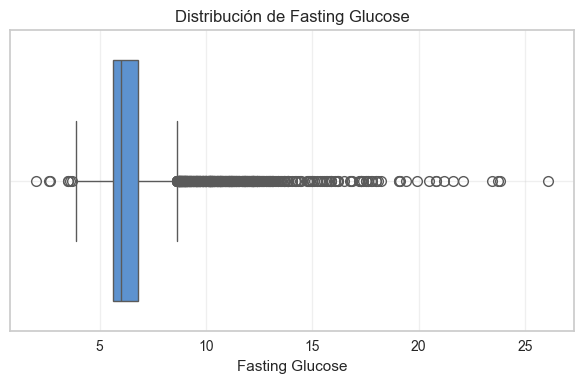

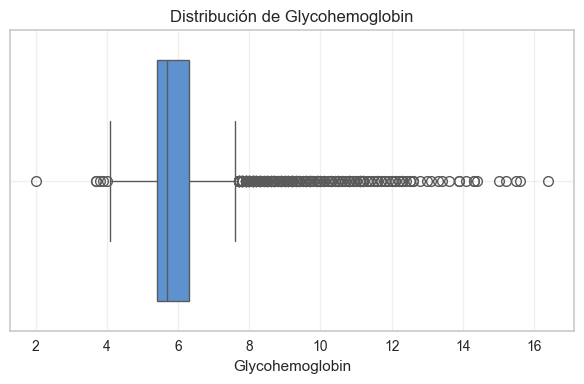

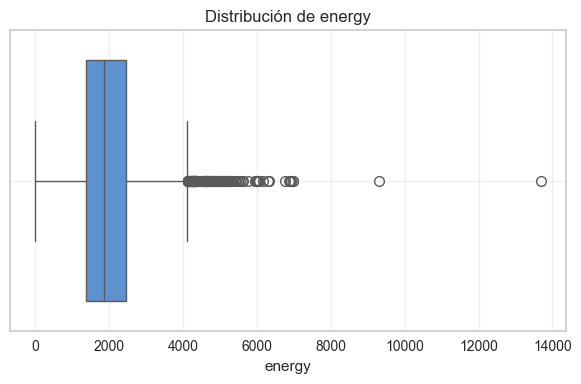

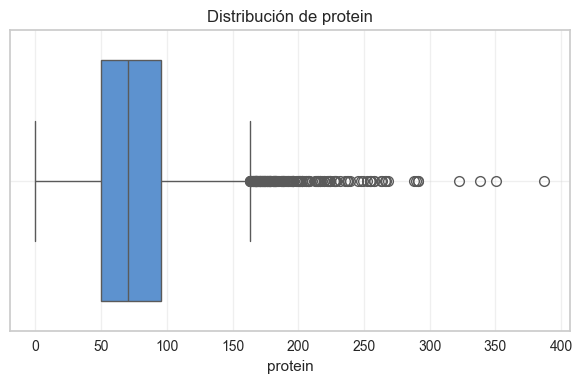

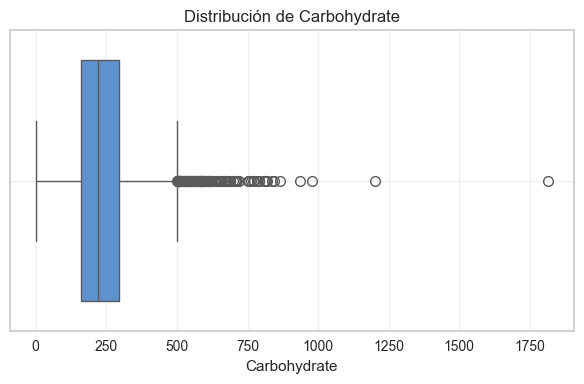

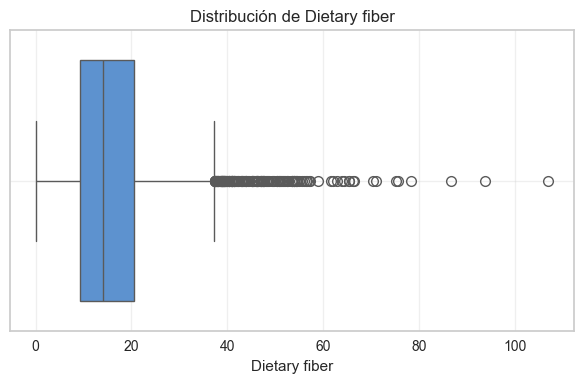

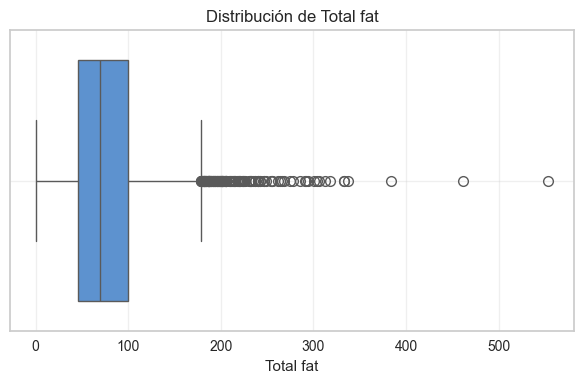

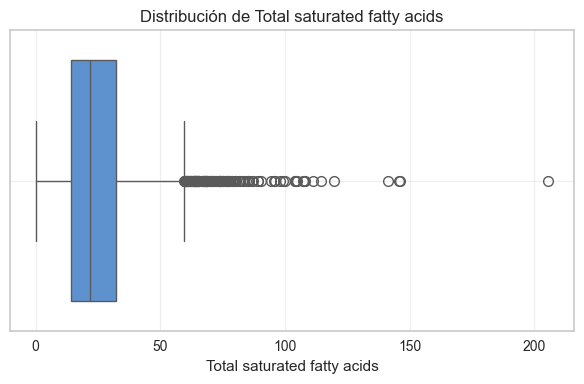

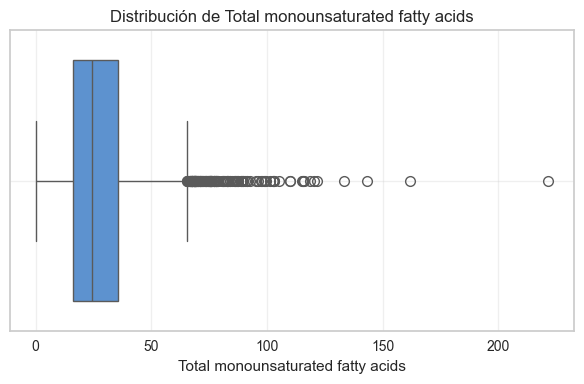

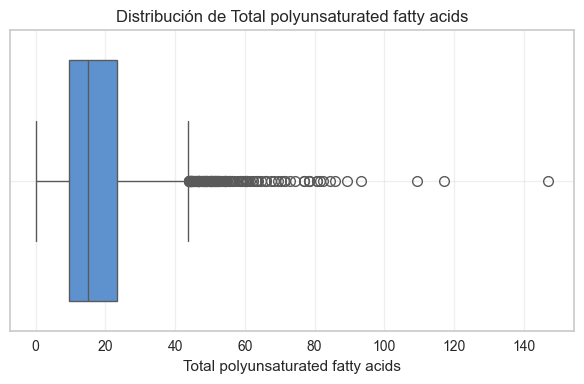

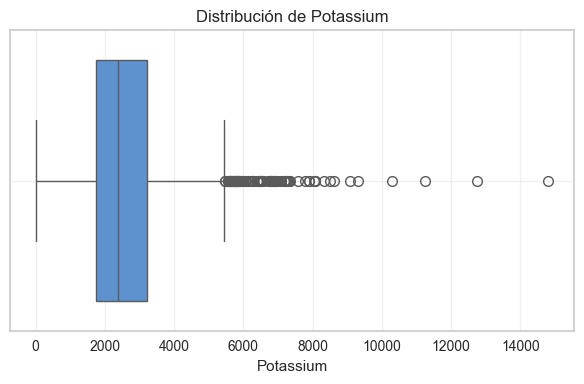

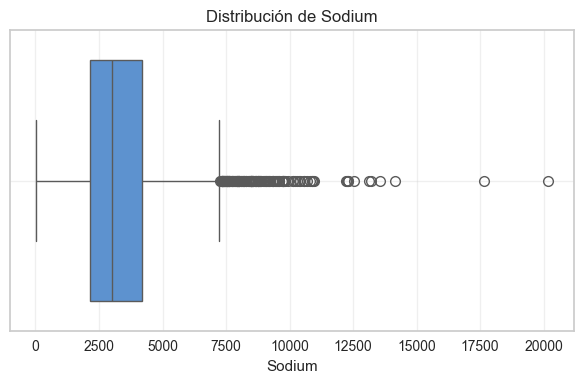

In [11]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color="#4a90e2")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

En términos generales, todas las variables numéricas del conjunto de datos presentan una asimetría positiva o sesgo hacia la derecha, lo que indica que la mayoría de los individuos se concentran en valores bajos o moderados, mientras que existe un subconjunto reducido con valores considerablemente altos.

Dado que los datos provienen de mediciones reales de pacientes (no simulados), estos valores extremos no deben considerarse errores, sino casos representativos de la variabilidad natural de la población. Es decir, reflejan individuos con condiciones metabólicas o estilos de vida particulares (por ejemplo, mayores consumos energéticos, colesterol o glucosa elevados).

Este patrón sugiere que el dataset describe una población heterogénea, donde los valores atípicos aportan información relevante para el modelado predictivo del riesgo de accidente cerebrovascular (ACV). Por lo tanto, en lugar de eliminarlos, resulta más apropiado mantenerlos y normalizar las variables (por ejemplo, mediante escalado logarítmico o estandarización) para que el modelo capture de forma equilibrada tanto los casos típicos como los de mayor riesgo clínico.

In [12]:
bounds = {}
outlier_indices = []

for col in numeric_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lb, ub = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    bounds[col] = (lb, ub)
    idx = df.index[(df[col] < lb) | (df[col] > ub)]
    outlier_indices.extend(idx)

outlier_counts = pd.Series(outlier_indices).value_counts()
outlier_counts = outlier_counts[outlier_counts > 1]

top_idx = outlier_counts.idxmax()
top_count = int(outlier_counts.max())

vars_outlier_top = [c for c,(lb,ub) in bounds.items()
                    if (df.at[top_idx, c] < lb) or (df.at[top_idx, c] > ub)]

threshold = max(1, top_count - 2)
similar_indices = outlier_counts[outlier_counts >= threshold].sort_values(ascending=False)
n_similar = len(similar_indices)

print("Índice con más outliers:", top_idx)
print("Número de outliers de ese índice:", top_count)
print("Variables donde es outlier:", vars_outlier_top)
print("Umbral de similaridad:", threshold)
print("Cantidad de índices con >= umbral:", n_similar)
print("Índices similares (ordenados):")
print(similar_indices.head(20))

Índice con más outliers: 1324
Número de outliers de ese índice: 12
Variables donde es outlier: ['Triglyceride', 'Fasting Glucose', 'Glycohemoglobin', 'energy', 'protein', 'Carbohydrate', 'Dietary fiber', 'Total fat', 'Total saturated fatty acids', 'Total monounsaturated fatty acids', 'Total polyunsaturated fatty acids', 'Sodium']
Umbral de similaridad: 10
Cantidad de índices con >= umbral: 15
Índices similares (ordenados):
1324    12
2477    11
1118    11
47      11
2975    11
2214    10
2926    10
2512    10
849     10
2401    10
2019    10
2773    10
1255    10
1813    10
3291    10
Name: count, dtype: int64


In [13]:
X = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.median())
Z = StandardScaler().fit_transform(X)

pca = PCA(n_components=3, random_state=random_state)
X3 = pca.fit_transform(Z)
pca_df = pd.DataFrame(X3, index=df.index, columns=['PC1','PC2','PC3'])
mask_sim = pca_df.index.isin(getattr(similar_indices, 'index', similar_indices))

pca_df['grupo'] = np.where(mask_sim, f'>= umbral ({threshold})', 'Otros Datos')

exp = pca.explained_variance_ratio_ * 100
title = f'PCA 3D — Var. exp. total {exp.sum():.1f}% (PC1 {exp[0]:.1f}%, PC2 {exp[1]:.1f}%, PC3 {exp[2]:.1f}%)'

fig = px.scatter_3d(
    pca_df,
    x='PC1', y='PC2', z='PC3',
    color='grupo',
    opacity=0.85,
    hover_name=pca_df.index.astype(str),
    title=title
)
fig.update_traces(marker=dict(size=4))
fig.update_layout(legend_title_text='Grupo')
fig.show()

A partir de esta visualización tridimensional del PCA, podemos observar que la mayoría de los puntos (en azul) se agrupan de forma compacta, mientras que un grupo reducido (en rojo) se separa claramente del resto.
Estos puntos alejados representan muestras con comportamientos numéricamente muy distintos al promedio general del conjunto. Aunque pueden corresponder a casos reales y válidos, su distancia sugiere que podrían tener un impacto desproporcionado en el entrenamiento de los modelos.

Por tanto, estas observaciones deben considerarse potenciales outliers significativos, y su verdadera relevancia o efecto se determinará más adelante mediante métricas confiables del modelo de clasificación seleccionado, evaluando si contribuyen a mejorar la capacidad predictiva o, por el contrario, introducen ruido al sistema.

In [14]:
pca_df['pred_stroke'] = df['stroke'].map({0: 'No stroke', 1: 'Stroke'})

fig = px.scatter_3d(
    pca_df,
    x='PC1', y='PC2', z='PC3',
    color='pred_stroke',
    opacity=0.85,
    labels={'pred_stroke': 'Predicción'},
    title='PCA 3D por predicción de Stroke'
)
fig.update_traces(marker=dict(size=4))
fig.show()

In [15]:
df_clean = pd.read_csv(f"{DATA_DIR}/nhanes_stroke_clean.csv")

print("Shape original :", df.shape)
print("Shape clean    :", df_clean.shape)
print("Filas eliminadas:", df.shape[0] - df_clean.shape[0])

cols_orig  = set(df.columns)
cols_clean = set(df_clean.columns)

eliminadas = sorted(cols_orig - cols_clean)
comunes    = sorted(cols_orig & cols_clean)

print("\n🔹 Columnas ELIMINADAS en stroke_clean:")
print(eliminadas if eliminadas else "  (ninguna)")

print("\n🔹 Columnas que se MANTIENEN en ambos datasets:")
print(comunes)


Shape original : (4603, 36)
Shape clean    : (4603, 31)
Filas eliminadas: 0

🔹 Columnas ELIMINADAS en stroke_clean:
['Carbohydrate', 'Total fat', 'Total monounsaturated fatty acids', 'Total polyunsaturated fatty acids', 'Total saturated fatty acids']

🔹 Columnas que se MANTIENEN en ambos datasets:
['Body Mass Index', 'Coronary Heart Disease', 'Diastolic blood pressure', 'Dietary fiber', 'Fasting Glucose', 'General health condition', 'Glycohemoglobin', 'Health Insurance', 'High-density lipoprotein', 'Low-density lipoprotein', 'Marital status', 'Minutes sedentary activity', 'Potassium', 'Race', 'Sodium', 'Systolic blood pressure', 'Triglyceride', 'Waist Circumference', 'age', 'alcohol', 'depression', 'diabetes', 'energy', 'gender', 'high cholesterol', 'hypertension', 'protein', 'sleep disorder', 'sleep time', 'smoke', 'stroke']


In [42]:
X = df[comunes].apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.median())
Z = StandardScaler().fit_transform(X)

pca = PCA(n_components=3, random_state=random_state)
X3 = pca.fit_transform(Z)
pca_df = pd.DataFrame(X3, index=df.index, columns=['PC1','PC2','PC3'])
mask_sim = pca_df.index.isin(getattr(similar_indices, 'index', similar_indices))

pca_df['pred_stroke'] = df['stroke'].map({0: 'No stroke', 1: 'Stroke'})

exp = pca.explained_variance_ratio_ * 100
title = f'PCA 3D — Var. exp. total {exp.sum():.1f}% (PC1 {exp[0]:.1f}%, PC2 {exp[1]:.1f}%, PC3 {exp[2]:.1f}%)'

fig = px.scatter_3d(
    pca_df,
    x='PC1', y='PC2', z='PC3',
    color='pred_stroke',
    opacity=0.85,
    labels={'pred_stroke': 'Predicción'},
    title=title
)
fig.update_traces(marker=dict(size=4))
fig.show()

In [59]:
primer_filtro = setup(
    data=df_clean,
    target='stroke',
    session_id=123,
    train_size=0.75,

    data_split_shuffle=True,
    data_split_stratify=True,

    fix_imbalance=True,
    normalize=True,

    pca=True,
    pca_method="linear",
    pca_components=5
)
best_model_1 = compare_models(n_select=5)

,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(4603, 31)"
4,Transformed data shape,"(7513, 6)"
5,Transformed train set shape,"(6362, 6)"
6,Transformed test set shape,"(1151, 6)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9215,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0590
et,Extra Trees Classifier,0.7651,0.6210,0.2845,0.1118,0.1597,0.0533,0.0612,0.2850
rf,Random Forest Classifier,0.7488,0.6126,0.2956,0.1061,0.1558,0.0457,0.0541,0.6580
lightgbm,Light Gradient Boosting Machine,0.7054,0.6202,0.4136,0.1143,0.1788,0.0643,0.0853,0.3640
dt,Decision Tree Classifier,0.6929,0.5414,0.3616,0.0987,0.1548,0.0365,0.0488,0.0560
gbc,Gradient Boosting Classifier,0.6495,0.6342,0.5317,0.1169,0.1913,0.0722,0.1074,0.5360
ada,Ada Boost Classifier,0.6428,0.6106,0.5500,0.1184,0.1943,0.0751,0.1125,0.2180
lr,Logistic Regression,0.6425,0.6865,0.6458,0.1338,0.2211,0.1049,0.1603,0.0430
ridge,Ridge Classifier,0.6413,0.6853,0.6493,0.1341,0.2218,0.1055,0.1614,0.2010
lda,Linear Discriminant Analysis,0.6408,0.6853,0.6421,0.1327,0.2194,0.1029,0.1573,0.0570


In [60]:
segundo_filtro = setup(
    data=df_clean,
    target='stroke',
    session_id=123,
    train_size=0.75,

    data_split_shuffle=True,
    data_split_stratify=True,

    fix_imbalance=True,
    normalize=True,

    pca=True,
    pca_method="linear",
    pca_components=25
)
best_model_2 = compare_models(n_select=5)

,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(4603, 31)"
4,Transformed data shape,"(7513, 26)"
5,Transformed train set shape,"(6362, 26)"
6,Transformed test set shape,"(1151, 26)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9215,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0450
et,Extra Trees Classifier,0.9021,0.6530,0.0329,0.1080,0.0500,0.0138,0.0170,0.3250
rf,Random Forest Classifier,0.8838,0.6370,0.0958,0.1498,0.1142,0.0555,0.0582,1.0860
lightgbm,Light Gradient Boosting Machine,0.8546,0.6035,0.1583,0.1421,0.1485,0.0700,0.0705,0.5420
dt,Decision Tree Classifier,0.7639,0.5374,0.2688,0.1055,0.1513,0.0437,0.0503,0.1650
gbc,Gradient Boosting Classifier,0.7613,0.6250,0.3173,0.1201,0.1737,0.0674,0.0779,1.8180
qda,Quadratic Discriminant Analysis,0.7187,0.6197,0.3984,0.1195,0.1832,0.0709,0.0892,0.0520
ada,Ada Boost Classifier,0.7120,0.6000,0.3577,0.1064,0.1635,0.0485,0.0614,0.4950
lr,Logistic Regression,0.6680,0.7130,0.6677,0.1469,0.2405,0.1284,0.1890,0.0500
nb,Naive Bayes,0.6668,0.5814,0.4425,0.1098,0.1755,0.0564,0.0757,0.0560


In [ ]:
tercer_filtro = setup(
    data=df_clean,
    target='stroke',
    session_id=123,
    train_size=0.75,

    data_split_shuffle=True,
    data_split_stratify=True,

    fix_imbalance=True,
    normalize=True,

    pca=True,
    pca_method="linear",
    pca_components=25
)
best_model_3 = compare_models(include=['et', 'rf', 'lr', 'svm'],n_select=4, sort='Recall')

,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(4603, 31)"
4,Transformed data shape,"(7513, 26)"
5,Transformed train set shape,"(6362, 26)"
6,Transformed test set shape,"(1151, 26)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.6448,0.7057,0.6860,0.1408,0.2336,0.1187,0.1815,0.0750
lr,Logistic Regression,0.6680,0.7130,0.6677,0.1469,0.2405,0.1284,0.1890,0.0760
rf,Random Forest Classifier,0.8838,0.6370,0.0958,0.1498,0.1142,0.0555,0.0582,1.0520
et,Extra Trees Classifier,0.9021,0.6530,0.0329,0.1080,0.0500,0.0138,0.0170,0.3100


In [61]:
modelos_base = best_model_3

tuned_models = []
metricas_tuning = []

for modelo in modelos_base:
    tuned = tune_model(modelo, optimize='Recall')  
    tuned_models.append(tuned)
    
    tabla = pull().copy()
    metricas_tuning.append(tabla)

tuned_models

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6763,0.7080,0.7407,0.1600,0.2632,0.1547,0.2298
1,0.6676,0.7718,0.8214,0.1729,0.2857,0.1755,0.2666
2,0.5594,0.6596,0.7778,0.1257,0.2165,0.0945,0.1713
3,0.6464,0.7416,0.7037,0.1429,0.2375,0.1235,0.1905
4,0.6087,0.6808,0.5926,0.1143,0.1916,0.0695,0.1108
5,0.6522,0.6943,0.6296,0.1339,0.2208,0.1053,0.1580
6,0.6725,0.6488,0.5556,0.1293,0.2098,0.0949,0.1353
7,0.6087,0.7475,0.7778,0.1400,0.2373,0.1206,0.2016
8,0.6029,0.7488,0.7778,0.1382,0.2346,0.1173,0.1979


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6994,0.7099,0.6667,0.1593,0.2571,0.1501,0.2110
1,0.6821,0.7721,0.7143,0.1639,0.2667,0.1555,0.2246
2,0.5971,0.6717,0.7407,0.1316,0.2235,0.1044,0.1762
3,0.6899,0.7438,0.7407,0.1667,0.2721,0.1655,0.2404
4,0.6551,0.6823,0.5926,0.1290,0.2119,0.0957,0.1416
5,0.6928,0.6921,0.5926,0.1441,0.2319,0.1213,0.1689
6,0.7101,0.6518,0.5556,0.1456,0.2308,0.1219,0.1636
7,0.6377,0.7329,0.6667,0.1343,0.2236,0.1073,0.1664
8,0.6435,0.7512,0.6667,0.1364,0.2264,0.1109,0.1703


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0780,0.5000,1.0000,0.0780,0.1448,0.0000,0.0000
1,0.0809,0.5000,1.0000,0.0809,0.1497,0.0000,0.0000
2,0.0783,0.5000,1.0000,0.0783,0.1452,0.0000,0.0000
3,0.0783,0.5000,1.0000,0.0783,0.1452,0.0000,0.0000
4,0.0783,0.5000,1.0000,0.0783,0.1452,0.0000,0.0000
5,0.0783,0.5000,1.0000,0.0783,0.1452,0.0000,0.0000
6,0.0783,0.5000,1.0000,0.0783,0.1452,0.0000,0.0000
7,0.0783,0.5000,1.0000,0.0783,0.1452,0.0000,0.0000
8,0.0783,0.5000,1.0000,0.0783,0.1452,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0780,0.5000,1.0000,0.0780,0.1448,0.0000,0.0000
1,0.0809,0.5000,1.0000,0.0809,0.1497,0.0000,0.0000
2,0.0783,0.5000,1.0000,0.0783,0.1452,0.0000,0.0000
3,0.0783,0.5000,1.0000,0.0783,0.1452,0.0000,0.0000
4,0.0783,0.5000,1.0000,0.0783,0.1452,0.0000,0.0000
5,0.0783,0.5000,1.0000,0.0783,0.1452,0.0000,0.0000
6,0.0783,0.5000,1.0000,0.0783,0.1452,0.0000,0.0000
7,0.0783,0.5000,1.0000,0.0783,0.1452,0.0000,0.0000
8,0.0783,0.5000,1.0000,0.0783,0.1452,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[SGDClassifier(alpha=1e-07, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.5, fit_intercept=True,
               l1_ratio=0.7700000001, learning_rate='adaptive', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=-1,
               penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
               tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                        criterion='gini', max_depth=9, max_features=1.0,
                        max_leaf_nodes=None, max_samples=None,
        

In [71]:
from sklearn.metrics import fbeta_score
from pycaret.classification import add_metric

add_metric(
    id='F2',
    name='F2-score',
    score_func=fbeta_score,
    greater_is_better=True,
    kwargs={'beta': 2}
)
modelos_base = best_model_3[-2:]   # últimos dos de la lista

tuned_models_2 = []
metricas_tuning_2 = []

for modelo in modelos_base:
    tuned = tune_model(modelo, optimize='F2')  # usamos la métrica F2
    tuned_models_2.append(tuned)

    tabla = pull().copy()
    metricas_tuning_2.append(tabla)

tuned_models_2


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2-score
Fold,,,,,,,,
0,0.7081,0.5745,0.2222,0.0698,0.1062,-0.0143,-0.0177,0.0000
1,0.7428,0.7063,0.5357,0.1648,0.2521,0.1465,0.1838,0.0000
2,0.6986,0.5641,0.4074,0.1111,0.1746,0.0589,0.0776,0.0000
3,0.7246,0.5431,0.3333,0.1047,0.1593,0.0456,0.0566,0.0000
4,0.7188,0.6155,0.4444,0.1277,0.1983,0.0874,0.1126,0.0000
5,0.7681,0.6816,0.4444,0.1558,0.2308,0.1299,0.1548,0.0000
6,0.7449,0.6568,0.4444,0.1412,0.2143,0.1084,0.1339,0.0000
7,0.6957,0.5766,0.3333,0.0938,0.1463,0.0275,0.0358,0.0000
8,0.7072,0.7126,0.5556,0.1442,0.2290,0.1196,0.1614,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2-score
Fold,,,,,,,,
0,0.6965,0.6368,0.4444,0.1176,0.1860,0.0715,0.0955,0.0000
1,0.7717,0.7480,0.6071,0.2000,0.3009,0.2040,0.2492,0.0000
2,0.6841,0.6119,0.4074,0.1058,0.1679,0.0499,0.0673,0.0000
3,0.6870,0.5829,0.3333,0.0909,0.1429,0.0227,0.0299,0.0000
4,0.6667,0.5537,0.4074,0.1000,0.1606,0.0399,0.0554,0.0000
5,0.7652,0.7290,0.5926,0.1860,0.2832,0.1862,0.2313,0.0000
6,0.7130,0.6536,0.4074,0.1170,0.1818,0.0686,0.0883,0.0000
7,0.6464,0.6038,0.3333,0.0796,0.1286,0.0026,0.0036,0.0000
8,0.6754,0.7021,0.6296,0.1429,0.2329,0.1207,0.1745,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_score=False, random_state=123, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_sc

In [19]:
from sklearn.svm import SVC

fine_tuning_1 = setup(
    data=df_clean,
    target='stroke',
    session_id=123,
    train_size=0.75,

    data_split_shuffle=True,
    data_split_stratify=True,

    fix_imbalance=True,
    normalize=True,

    pca=True,
    pca_method="linear",
    pca_components=25
)

lr_base  = create_model('lr')   # Logistic Regression

print("INICIANDO LR\n")

lr_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced'],
    'solver': ['lbfgs', 'liblinear']
}

lr_tuned = tune_model(
    lr_base,
    optimize='Recall',
    custom_grid=lr_grid
)

lr_tuning_table = pull().copy()  # resultados del tuning de LR

print("INICIANDO SVM con KERNEL\n")

svm_rbf_base  = create_model(SVC(kernel='rbf',     probability=True, random_state=123))
svm_poly_base = create_model(SVC(kernel='poly',    probability=True, random_state=123))
svm_sig_base  = create_model(SVC(kernel='sigmoid', probability=True, random_state=123))

# Grilla común para las SVC (C y gamma)
svc_grid = {
    'C':     [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

svm_rbf_tuned = tune_model(
    svm_rbf_base,
    optimize='Recall',
    custom_grid=svc_grid
)

svm_poly_tuned = tune_model(
    svm_poly_base,
    optimize='Recall',
    custom_grid=svc_grid
)

svm_sig_tuned = tune_model(
    svm_sig_base,
    optimize='Recall',
    custom_grid=svc_grid
)

mejores_svm = compare_models(
    include=[svm_rbf_tuned, svm_poly_tuned, svm_sig_tuned],
    sort='Recall'
)

tabla_svm = pull()
tabla_svm

mejor_final = compare_models(include=[lr_tuned, svm_rbf_tuned, svm_poly_tuned, svm_sig_tuned], sort='Recall')
tabla_final = pull()
tabla_final


,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(4603, 31)"
4,Transformed data shape,"(7513, 26)"
5,Transformed train set shape,"(6362, 26)"
6,Transformed test set shape,"(1151, 26)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6994,0.7099,0.6667,0.1593,0.2571,0.1501,0.2110
1,0.6821,0.7721,0.7143,0.1639,0.2667,0.1555,0.2246
2,0.6000,0.6717,0.7407,0.1325,0.2247,0.1060,0.1780
3,0.6899,0.7440,0.7407,0.1667,0.2721,0.1655,0.2404
4,0.6551,0.6824,0.5926,0.1290,0.2119,0.0957,0.1416
5,0.6928,0.6922,0.5926,0.1441,0.2319,0.1213,0.1689
6,0.7101,0.6516,0.5556,0.1456,0.2308,0.1219,0.1636
7,0.6377,0.7329,0.6667,0.1343,0.2236,0.1073,0.1664
8,0.6435,0.7512,0.6667,0.1364,0.2264,0.1109,0.1703


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6676,0.7101,0.7407,0.1562,0.2581,0.1483,0.2234
1,0.6850,0.7637,0.7857,0.1760,0.2876,0.1790,0.2622
2,0.6000,0.6501,0.5926,0.1119,0.1882,0.0652,0.1053
3,0.6580,0.7536,0.7407,0.1527,0.2532,0.1418,0.2168
4,0.6000,0.6345,0.5556,0.1064,0.1786,0.0543,0.0870
5,0.6638,0.6843,0.7037,0.1496,0.2468,0.1351,0.2028
6,0.6551,0.6635,0.5926,0.1290,0.2119,0.0957,0.1416
7,0.6174,0.7442,0.7778,0.1429,0.2414,0.1258,0.2072
8,0.6580,0.7383,0.7037,0.1473,0.2436,0.1311,0.1986


INICIANDO LR



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6994,0.7099,0.6667,0.1593,0.2571,0.1501,0.2110
1,0.6821,0.7721,0.7143,0.1639,0.2667,0.1555,0.2246
2,0.6000,0.6717,0.7407,0.1325,0.2247,0.1060,0.1780
3,0.6899,0.7440,0.7407,0.1667,0.2721,0.1655,0.2404
4,0.6551,0.6824,0.5926,0.1290,0.2119,0.0957,0.1416
5,0.6928,0.6922,0.5926,0.1441,0.2319,0.1213,0.1689
6,0.7101,0.6516,0.5556,0.1456,0.2308,0.1219,0.1636
7,0.6377,0.7329,0.6667,0.1343,0.2236,0.1073,0.1664
8,0.6435,0.7512,0.6667,0.1364,0.2264,0.1109,0.1703


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
INICIANDO SVM con KERNEL



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8324,0.5449,0.0370,0.0303,0.0333,-0.0574,-0.0578
1,0.8728,0.6724,0.1786,0.1923,0.1852,0.1163,0.1164
2,0.8551,0.6238,0.1852,0.1515,0.1667,0.0882,0.0887
3,0.8812,0.5822,0.1481,0.1818,0.1633,0.1000,0.1006
4,0.8522,0.4655,0.1111,0.1000,0.1053,0.0249,0.0250
5,0.8609,0.7379,0.1481,0.1379,0.1429,0.0673,0.0673
6,0.8725,0.6197,0.1481,0.1600,0.1538,0.0850,0.0851
7,0.8406,0.5311,0.1852,0.1316,0.1538,0.0686,0.0698
8,0.8580,0.6419,0.2222,0.1765,0.1967,0.1199,0.1209


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7254,0.5936,0.3704,0.1136,0.1739,0.0619,0.0775
1,0.8064,0.6550,0.5000,0.2090,0.2947,0.2039,0.2301
2,0.7159,0.6133,0.4074,0.1183,0.1833,0.0706,0.0905
3,0.7507,0.6857,0.4444,0.1446,0.2182,0.1135,0.1390
4,0.7652,0.6077,0.4074,0.1447,0.2136,0.1109,0.1316
5,0.7536,0.7213,0.4444,0.1463,0.2202,0.1161,0.1415
6,0.7565,0.6101,0.2963,0.1096,0.1600,0.0516,0.0604
7,0.7478,0.6674,0.5185,0.1591,0.2435,0.1405,0.1761
8,0.7130,0.6212,0.4444,0.1250,0.1951,0.0831,0.1081


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5723,0.5935,0.5556,0.0993,0.1685,0.0417,0.0699
1,0.5780,0.7226,0.7500,0.1312,0.2234,0.0993,0.1711
2,0.5217,0.5634,0.5926,0.0941,0.1624,0.0316,0.0582
3,0.6087,0.6132,0.6296,0.1197,0.2012,0.0802,0.1291
4,0.5681,0.6186,0.5926,0.1039,0.1768,0.0503,0.0857
5,0.6000,0.6386,0.6296,0.1172,0.1977,0.0757,0.1236
6,0.5333,0.4983,0.3333,0.0592,0.1006,-0.0373,-0.0629
7,0.5768,0.6862,0.6296,0.1111,0.1889,0.0644,0.1092
8,0.5188,0.7016,0.7778,0.1160,0.2019,0.0761,0.1477


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7803,0.6306,0.1852,0.0847,0.1163,0.0103,0.0113
1,0.8237,0.7233,0.4643,0.2203,0.2989,0.2124,0.2318
2,0.7768,0.6780,0.2963,0.1212,0.1720,0.0686,0.0778
3,0.8116,0.6210,0.2963,0.1481,0.1975,0.1040,0.1121
4,0.7739,0.5003,0.2222,0.0952,0.1333,0.0267,0.0299
5,0.8203,0.7349,0.5185,0.2222,0.3111,0.2263,0.2533
6,0.8261,0.6494,0.3333,0.1765,0.2308,0.1431,0.1523
7,0.7594,0.5524,0.3333,0.1216,0.1782,0.0718,0.0844
8,0.7623,0.6513,0.3704,0.1333,0.1961,0.0915,0.1081


Fitting 10 folds for each of 6 candidates, totalling 60 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6185,0.6679,0.5185,0.1053,0.1750,0.0520,0.0802
1,0.6474,0.7102,0.7143,0.1493,0.2469,0.1305,0.1992
2,0.5391,0.6299,0.7037,0.1118,0.1929,0.0669,0.1229
3,0.5942,0.7163,0.8519,0.1447,0.2473,0.1310,0.2286
4,0.5217,0.5554,0.5556,0.0893,0.1538,0.0220,0.0400
5,0.6290,0.7273,0.7407,0.1418,0.2381,0.1229,0.1968
6,0.6261,0.6844,0.5556,0.1136,0.1887,0.0675,0.1037
7,0.5188,0.6606,0.7037,0.1073,0.1863,0.0584,0.1111
8,0.5275,0.6910,0.8148,0.1222,0.2126,0.0885,0.1710


Fitting 10 folds for each of 6 candidates, totalling 60 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6532,0.6757,0.7407,0.1504,0.2500,0.1382,0.2131
1,0.6272,0.7653,0.8571,0.1611,0.2712,0.1562,0.2556
2,0.5362,0.6512,0.7407,0.1156,0.2000,0.0747,0.1395
3,0.6261,0.7036,0.7037,0.1357,0.2275,0.1109,0.1768
4,0.5797,0.6967,0.6296,0.1118,0.1899,0.0658,0.1110
5,0.6174,0.6855,0.6296,0.1223,0.2048,0.0849,0.1347
6,0.6377,0.6081,0.4815,0.1048,0.1722,0.0501,0.0741
7,0.5855,0.7418,0.8148,0.1375,0.2353,0.1170,0.2051
8,0.6203,0.7807,0.8519,0.1533,0.2599,0.1467,0.2452


Fitting 10 folds for each of 6 candidates, totalling 60 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
2,SVM - Radial Kernel,0.6115,0.7042,0.7190,0.1335,0.2250,0.1069,0.1754,3.0250
1,SVM - Radial Kernel,0.5820,0.6668,0.6714,0.1191,0.2019,0.0793,0.1339,2.4300
0,SVM - Radial Kernel,0.7929,0.6378,0.3316,0.1457,0.2018,0.1040,0.1155,3.0660


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
3,SVM - Radial Kernel,0.6115,0.7042,0.7190,0.1335,0.2250,0.1069,0.1754,2.6210
2,SVM - Radial Kernel,0.5820,0.6668,0.6714,0.1191,0.2019,0.0793,0.1339,2.3090
0,Logistic Regression,0.6680,0.7130,0.6677,0.1469,0.2405,0.1284,0.1890,0.0380
1,SVM - Radial Kernel,0.7929,0.6378,0.3316,0.1457,0.2018,0.1040,0.1155,2.8770


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
3,SVM - Radial Kernel,0.6115,0.7042,0.7190,0.1335,0.2250,0.1069,0.1754,2.621
2,SVM - Radial Kernel,0.5820,0.6668,0.6714,0.1191,0.2019,0.0793,0.1339,2.309
0,Logistic Regression,0.6680,0.7130,0.6677,0.1469,0.2405,0.1284,0.1890,0.038
1,SVM - Radial Kernel,0.7929,0.6378,0.3316,0.1457,0.2018,0.1040,0.1155,2.877


In [24]:
print(lr_tuned)
print(svm_sig_tuned)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=True, random_state=123, shrinking=True, tol=0.001,
    verbose=False)


In [25]:
base_svm_sig = svm_sig_tuned

svc_grid_fino = {
    'C':        [0.01, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2, 0.3],
    'gamma':    ['scale', 'auto', 0.01, 0.1, 1],
    'coef0':    [-1.0, -0.5, 0.0, 0.5, 1.0],
    'class_weight': [None, 'balanced']
}

svm_sig_finetuned = tune_model(
    base_svm_sig,
    optimize='Recall',        
    custom_grid=svc_grid_fino,
    fold=10                   
)

tabla_fina = pull().copy()
tabla_fina.head()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6734,0.7224,0.7037,0.1532,0.2517,0.1416,0.2095
1,0.6358,0.7712,0.7857,0.1549,0.2588,0.1430,0.2264
2,0.5536,0.7002,0.8148,0.1287,0.2222,0.1007,0.1860
3,0.6174,0.7444,0.7778,0.1429,0.2414,0.1258,0.2072
4,0.5913,0.6867,0.6667,0.1200,0.2034,0.0816,0.1363
5,0.6087,0.6825,0.5926,0.1143,0.1916,0.0695,0.1108
6,0.6522,0.6481,0.5185,0.1157,0.1892,0.0702,0.1025
7,0.5768,0.7600,0.8148,0.1350,0.2316,0.1124,0.1998
8,0.5797,0.7916,0.8889,0.1446,0.2487,0.1318,0.2378


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6734,0.7224,0.7037,0.1532,0.2517,0.1416,0.2095
1,0.6358,0.7712,0.7857,0.1549,0.2588,0.1430,0.2264
2,0.5536,0.7002,0.8148,0.1287,0.2222,0.1007,0.1860
3,0.6174,0.7444,0.7778,0.1429,0.2414,0.1258,0.2072
4,0.5913,0.6867,0.6667,0.1200,0.2034,0.0816,0.1363


In [26]:
print(svm_sig_finetuned)

SVC(C=0.2, break_ties=False, cache_size=200, class_weight=None, coef0=1.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=True, random_state=123, shrinking=True, tol=0.001,
    verbose=False)


In [27]:
from sklearn.linear_model import LogisticRegression

lr_fine_grid_l2 = {
    'C': [0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.3, 1.4, 1.5],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'newton-cg', 'sag'],
    'class_weight': [None, 'balanced'],
    'tol': [1e-5, 1e-4, 1e-3],
    'max_iter': [1000, 2000]
}

print("\nBúsqueda 1: L2 Regularization")
print(f"Combinaciones a probar: {14*3*2*3*2}")

lr_base = create_model('lr', verbose=False)
lr_tuned_l2 = tune_model(
    lr_base,
    optimize='Recall',
    custom_grid=lr_fine_grid_l2,
    fold=5,
    verbose=True
)
results_l2 = pull()
print("\nMejores parámetros L2:")
print(lr_tuned_l2)

print("\n" + "-" * 70)
print("Búsqueda 2: L1 Regularization")

lr_fine_grid_l1 = {
    'C': [0.6, 0.8, 1.0, 1.2, 1.5, 2.0],
    'penalty': ['l1'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'tol': [1e-5, 1e-4],
    'max_iter': [2000, 3000]
}

lr_base_l1 = create_model('lr', verbose=False)
lr_tuned_l1 = tune_model(
    lr_base_l1,
    optimize='Recall',
    custom_grid=lr_fine_grid_l1,
    fold=5,
    verbose=True
)
results_l1 = pull()
print("\nMejores parámetros L1:")
print(lr_tuned_l1)

print("\n" + "-" * 70)
print("Búsqueda 3: ElasticNet Regularization")

lr_fine_grid_en = {
    'C': [0.8, 1.0, 1.2, 1.5],
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'class_weight': [None, 'balanced'],
    'tol': [1e-4],
    'max_iter': [3000]
}

lr_base_en = create_model('lr', verbose=False)
lr_tuned_en = tune_model(
    lr_base_en,
    optimize='Recall',
    custom_grid=lr_fine_grid_en,
    fold=5,
    verbose=True
)
results_en = pull()
print("\nMejores parámetros ElasticNet:")
print(lr_tuned_en)

print("\n" + "=" * 70)
print("Comparación final modelos LR")
print("=" * 70)

mejor_lr = compare_models(
    include=[lr_tuned_l2, lr_tuned_l1, lr_tuned_en],
    sort='Recall'
)
tabla_comparacion = pull()
print("\nTabla comparativa:")
display(tabla_comparacion)

print("Mejor modelo Logistic Regression:")
print(mejor_lr)



Búsqueda 1: L2 Regularization
Combinaciones a probar: 504


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6874,0.7270,0.6296,0.1478,0.2394,0.1292,0.1834
1,0.6527,0.7097,0.7091,0.1483,0.2453,0.1309,0.1990
2,0.6696,0.6993,0.5926,0.1345,0.2192,0.1050,0.1518
3,0.6536,0.6929,0.5926,0.1285,0.2112,0.0948,0.1406
4,0.6609,0.7262,0.6481,0.1400,0.2303,0.1165,0.1733
Mean,0.6648,0.7110,0.6344,0.1398,0.2291,0.1153,0.1696
Std,0.0128,0.0138,0.0431,0.0076,0.0126,0.0139,0.0211


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

Mejores parámetros L2:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

----------------------------------------------------------------------
Búsqueda 2: L1 Regularization


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6874,0.7269,0.6296,0.1478,0.2394,0.1292,0.1834
1,0.6527,0.7099,0.7091,0.1483,0.2453,0.1309,0.1990
2,0.6696,0.6992,0.5926,0.1345,0.2192,0.1050,0.1518
3,0.6522,0.6927,0.5926,0.1280,0.2105,0.0939,0.1396
4,0.6609,0.7265,0.6481,0.1400,0.2303,0.1165,0.1733
Mean,0.6645,0.7110,0.6344,0.1397,0.2289,0.1151,0.1694
Std,0.0131,0.0139,0.0431,0.0078,0.0128,0.0142,0.0214


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

Mejores parámetros L1:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

----------------------------------------------------------------------
Búsqueda 3: ElasticNet Regularization


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6874,0.7270,0.6296,0.1478,0.2394,0.1292,0.1834
1,0.6527,0.7098,0.7091,0.1483,0.2453,0.1309,0.1990
2,0.6696,0.6993,0.5926,0.1345,0.2192,0.1050,0.1518
3,0.6536,0.6928,0.5926,0.1285,0.2112,0.0948,0.1406
4,0.6609,0.7263,0.6481,0.1400,0.2303,0.1165,0.1733
Mean,0.6648,0.7111,0.6344,0.1398,0.2291,0.1153,0.1696
Std,0.0128,0.0138,0.0431,0.0076,0.0126,0.0139,0.0211


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

Mejores parámetros ElasticNet:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Comparación final modelos LR


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.6680,0.7130,0.6677,0.1469,0.2405,0.1284,0.1890,0.0300
1,Logistic Regression,0.6680,0.7130,0.6677,0.1469,0.2405,0.1284,0.1890,0.0290
2,Logistic Regression,0.6680,0.7130,0.6677,0.1469,0.2405,0.1284,0.1890,0.0300



Tabla comparativa:


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.668,0.713,0.6677,0.1469,0.2405,0.1284,0.189,0.030
1,Logistic Regression,0.668,0.713,0.6677,0.1469,0.2405,0.1284,0.189,0.029
2,Logistic Regression,0.668,0.713,0.6677,0.1469,0.2405,0.1284,0.189,0.030


Mejor modelo Logistic Regression:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
pca_list = [15, 20, 22, 25, 27, 30]

resultados = []

for p in pca_list:
    print(f"\n=== Probando PCA con pca_components = {p} ===")

    setup(
        data=df_clean,
        target='stroke',
        session_id=123,

        train_size=0.8,
        data_split_shuffle=True,
        data_split_stratify=True,
        fold_strategy='stratifiedkfold',
        normalize=True,
        fix_imbalance=True,

        pca=True,
        pca_method='linear',
        pca_components=p,
    )

    lr_fixed = LogisticRegression(
        C=1.0,
        penalty='l2',
        solver='lbfgs',
        max_iter=1000,
        tol=0.0001,
        class_weight=None,
        random_state=123
    )

    lr_model = create_model(lr_fixed)   
    tabla = pull().copy()              

    fila = tabla.iloc[-2].copy()       
    fila['pca_components'] = p
    resultados.append(fila)

res_pca = pd.DataFrame(resultados)
res_pca[['pca_components', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa', 'MCC']]



=== Probando PCA con pca_components = 15 ===


,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(4603, 31)"
4,Transformed data shape,"(7705, 16)"
5,Transformed train set shape,"(6784, 16)"
6,Transformed test set shape,"(921, 16)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6558,0.7551,0.5517,0.1231,0.2013,0.0835,0.1219
1,0.6531,0.6482,0.5172,0.1163,0.1899,0.0706,0.1027
2,0.6848,0.7311,0.5862,0.1405,0.2267,0.1140,0.1603
3,0.6522,0.7352,0.6897,0.1439,0.2381,0.1238,0.1882
4,0.6658,0.6342,0.5172,0.1210,0.1961,0.0784,0.1116
5,0.6630,0.7116,0.5862,0.1318,0.2152,0.0993,0.1445
6,0.6929,0.7145,0.6552,0.1557,0.2517,0.1425,0.2011
7,0.6549,0.6559,0.6207,0.1343,0.2209,0.1049,0.1559
8,0.6522,0.6556,0.5862,0.1278,0.2099,0.0924,0.1369



=== Probando PCA con pca_components = 20 ===


,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(4603, 31)"
4,Transformed data shape,"(7705, 21)"
5,Transformed train set shape,"(6784, 21)"
6,Transformed test set shape,"(921, 21)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6640,0.7363,0.5517,0.1260,0.2051,0.0885,0.1276
1,0.6531,0.6450,0.6207,0.1333,0.2195,0.1035,0.1545
2,0.6739,0.7452,0.5862,0.1360,0.2208,0.1065,0.1523
3,0.6630,0.7383,0.6897,0.1481,0.2439,0.1312,0.1959
4,0.6793,0.6455,0.4483,0.1130,0.1806,0.0626,0.0857
5,0.6766,0.7137,0.5517,0.1311,0.2119,0.0969,0.1368
6,0.6984,0.7082,0.6552,0.1583,0.2550,0.1467,0.2053
7,0.6359,0.6578,0.6552,0.1329,0.2209,0.1035,0.1600
8,0.6522,0.6635,0.5517,0.1221,0.2000,0.0815,0.1196



=== Probando PCA con pca_components = 22 ===


,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(4603, 31)"
4,Transformed data shape,"(7705, 23)"
5,Transformed train set shape,"(6784, 23)"
6,Transformed test set shape,"(921, 23)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6558,0.7302,0.6552,0.1397,0.2303,0.1157,0.1735
1,0.6531,0.6467,0.6207,0.1333,0.2195,0.1035,0.1545
2,0.6766,0.7443,0.6207,0.1429,0.2323,0.1194,0.1715
3,0.6549,0.7401,0.6897,0.1449,0.2395,0.1256,0.1901
4,0.6929,0.6504,0.4483,0.1182,0.1871,0.0712,0.0954
5,0.6739,0.7070,0.5517,0.1301,0.2105,0.0951,0.1348
6,0.6929,0.7009,0.6552,0.1557,0.2517,0.1425,0.2011
7,0.6386,0.6681,0.6552,0.1338,0.2222,0.1051,0.1618
8,0.6576,0.6635,0.5862,0.1298,0.2125,0.0958,0.1406



=== Probando PCA con pca_components = 25 ===


,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(4603, 31)"
4,Transformed data shape,"(7705, 26)"
5,Transformed train set shape,"(6784, 26)"
6,Transformed test set shape,"(921, 26)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6477,0.7123,0.6552,0.1367,0.2262,0.1105,0.1678
1,0.6558,0.6477,0.5862,0.1288,0.2112,0.0945,0.1392
2,0.6549,0.7483,0.6207,0.1343,0.2209,0.1049,0.1559
3,0.6630,0.7527,0.7586,0.1583,0.2619,0.1512,0.2298
4,0.6658,0.6576,0.4828,0.1148,0.1854,0.0666,0.0940
5,0.6739,0.7191,0.6552,0.1473,0.2405,0.1283,0.1867
6,0.6848,0.7095,0.6552,0.1520,0.2468,0.1363,0.1948
7,0.6359,0.6605,0.6207,0.1277,0.2118,0.0932,0.1429
8,0.6440,0.6702,0.5517,0.1194,0.1963,0.0767,0.1140



=== Probando PCA con pca_components = 27 ===


,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(4603, 31)"
4,Transformed data shape,"(7705, 28)"
5,Transformed train set shape,"(6784, 28)"
6,Transformed test set shape,"(921, 28)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6531,0.7096,0.6552,0.1387,0.2289,0.1140,0.1716
1,0.6612,0.6389,0.5172,0.1190,0.1935,0.0754,0.1083
2,0.6522,0.7495,0.6207,0.1333,0.2195,0.1032,0.1541
3,0.6658,0.7476,0.7931,0.1643,0.2722,0.1629,0.2486
4,0.6630,0.6587,0.4828,0.1138,0.1842,0.0650,0.0921
5,0.6685,0.7148,0.6207,0.1395,0.2278,0.1138,0.1656
6,0.6875,0.7065,0.5862,0.1417,0.2282,0.1160,0.1623
7,0.6332,0.6580,0.6207,0.1268,0.2105,0.0916,0.1411
8,0.6386,0.6665,0.5517,0.1176,0.1939,0.0736,0.1104



=== Probando PCA con pca_components = 30 ===


,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(4603, 31)"
4,Transformed data shape,"(7705, 31)"
5,Transformed train set shape,"(6784, 31)"
6,Transformed test set shape,"(921, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6450,0.7003,0.5862,0.1250,0.2061,0.0879,0.1318
1,0.6423,0.6424,0.4483,0.1008,0.1646,0.0416,0.0604
2,0.6603,0.7512,0.6207,0.1364,0.2236,0.1084,0.1598
3,0.6712,0.7500,0.7586,0.1618,0.2667,0.1572,0.2357
4,0.6793,0.6722,0.5172,0.1261,0.2027,0.0870,0.1212
5,0.6739,0.7145,0.6207,0.1417,0.2308,0.1175,0.1695
6,0.7065,0.6852,0.6897,0.1681,0.2703,0.1644,0.2290
7,0.6277,0.6585,0.5862,0.1197,0.1988,0.0782,0.1204
8,0.6359,0.6530,0.5172,0.1111,0.1829,0.0611,0.0913


,pca_components,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Mean,15.0,0.6643,0.7007,0.6000,0.1345,0.2196,0.1044,0.1523
Mean,20.0,0.6687,0.7027,0.6069,0.1372,0.2236,0.1093,0.1588
Mean,22.0,0.6681,0.7025,0.6207,0.1391,0.2271,0.1131,0.1652
Mean,25.0,0.6608,0.7053,0.6310,0.1381,0.2265,0.1117,0.1652
Mean,27.0,0.6619,0.7026,0.6207,0.1368,0.2241,0.1092,0.1608
Mean,30.0,0.6624,0.7007,0.6103,0.1357,0.2220,0.1069,0.1563


In [67]:
setup(
        data=df_clean,
        target='stroke',
        session_id=123,

        train_size=0.8,
        data_split_shuffle=True,
        data_split_stratify=True,
        fold_strategy='stratifiedkfold',
        normalize=True,
        fix_imbalance=True,

        pca=True,
        pca_method='linear',
        pca_components=25,
    )

lr_model = create_model(lr_fixed)   
tabla = pull().copy()              

,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(4603, 31)"
4,Transformed data shape,"(7705, 26)"
5,Transformed train set shape,"(6784, 26)"
6,Transformed test set shape,"(921, 26)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6477,0.7123,0.6552,0.1367,0.2262,0.1105,0.1678
1,0.6558,0.6477,0.5862,0.1288,0.2112,0.0945,0.1392
2,0.6549,0.7483,0.6207,0.1343,0.2209,0.1049,0.1559
3,0.6630,0.7527,0.7586,0.1583,0.2619,0.1512,0.2298
4,0.6658,0.6576,0.4828,0.1148,0.1854,0.0666,0.0940
5,0.6739,0.7191,0.6552,0.1473,0.2405,0.1283,0.1867
6,0.6848,0.7095,0.6552,0.1520,0.2468,0.1363,0.1948
7,0.6359,0.6605,0.6207,0.1277,0.2118,0.0932,0.1429
8,0.6440,0.6702,0.5517,0.1194,0.1963,0.0767,0.1140


Transformation Pipeline and Model Successfully Saved


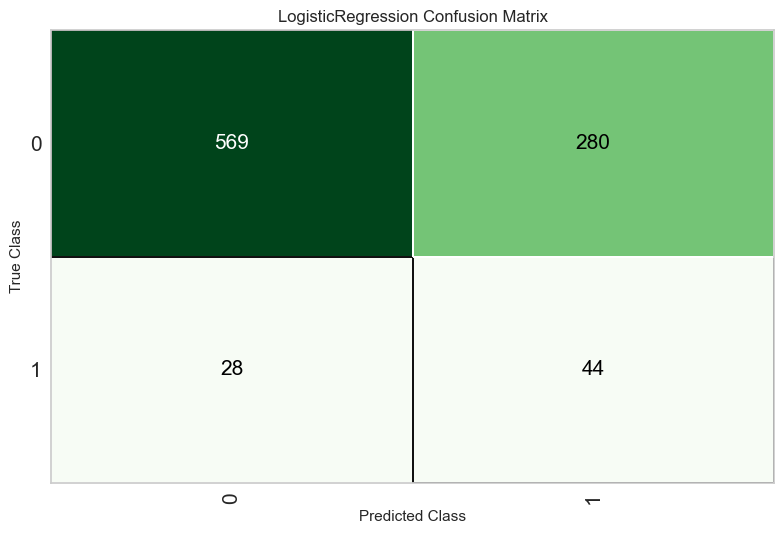

In [68]:
final_lr = finalize_model(lr_model)

save_model(final_lr, 'lr_pca25_smote')

plot_model(final_lr, plot='confusion_matrix')


Distribución después de undersampling:
stroke
0    362
1    362
Name: count, dtype: int64


,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(724, 31)"
4,Transformed data shape,"(725, 26)"
5,Transformed train set shape,"(580, 26)"
6,Transformed test set shape,"(145, 26)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7241,0.7824,0.7241,0.7241,0.7241,0.4483,0.4483
1,0.6379,0.7075,0.5862,0.6538,0.6182,0.2759,0.2774
2,0.6724,0.7134,0.5862,0.7083,0.6415,0.3448,0.3501
3,0.6552,0.7218,0.6552,0.6552,0.6552,0.3103,0.3103
4,0.7241,0.7229,0.6897,0.7407,0.7143,0.4483,0.4493
5,0.6207,0.6635,0.6552,0.6129,0.6333,0.2414,0.2420
6,0.5517,0.6683,0.5862,0.5484,0.5667,0.1034,0.1037
7,0.5690,0.6088,0.6207,0.5625,0.5902,0.1379,0.1387
8,0.6034,0.6052,0.7241,0.5833,0.6462,0.2069,0.2132


Transformation Pipeline and Model Successfully Saved


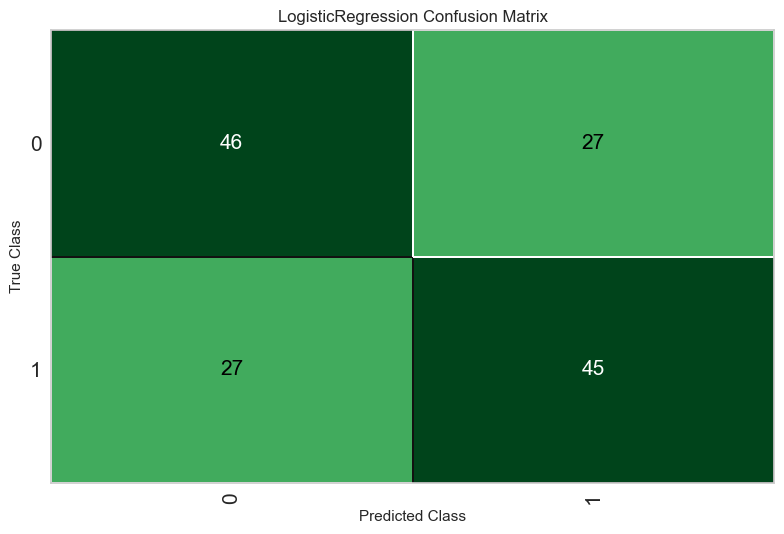

In [75]:
from sklearn.utils import resample

df_major = df_clean[df_clean["stroke"] == 0]  # clase mayoritaria
df_minor = df_clean[df_clean["stroke"] == 1]  # clase minoritaria

RATIO = 1
n_min = len(df_minor)
n_maj_target = RATIO * n_min

df_major_down = resample(
    df_major,
    replace=False,
    n_samples=n_maj_target,
    random_state=123
)

df_balanced = pd.concat([df_major_down, df_minor], axis=0)
df_balanced = df_balanced.sample(frac=1, random_state=123).reset_index(drop=True)

print("Distribución después de undersampling:")
print(df_balanced["stroke"].value_counts())

setup(
        data=df_balanced,
        target='stroke',
        session_id=123,

        train_size=0.8,
        data_split_shuffle=True,
        data_split_stratify=True,
        fold_strategy='stratifiedkfold',
        normalize=True,
        fix_imbalance=True,

        pca=True,
        pca_method='linear',
        pca_components=25,
    )

lr_model_under = create_model(lr_fixed)  
final_under = finalize_model(lr_model_under) 
save_model(final_under, 'lr_pca25_under')
tabla = pull().copy()   
plot_model(final_lr, plot='confusion_matrix')           

              precision    recall  f1-score   support

           0       0.94      0.54      0.69       849
           1       0.10      0.60      0.17        72

    accuracy                           0.55       921
   macro avg       0.52      0.57      0.43       921
weighted avg       0.88      0.55      0.65       921



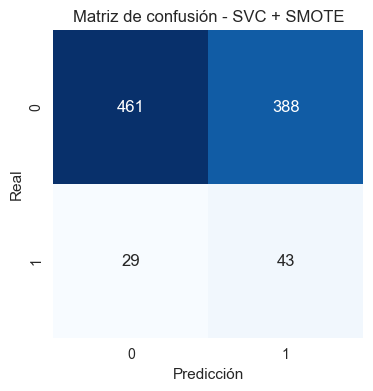

In [ ]:
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df_clean.drop('stroke', axis=1)
y = df_clean['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=123
)

sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

clf = SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=True, random_state=123, shrinking=True, tol=0.001,
    verbose=False)
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de confusión - SVC + SMOTE")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


              precision    recall  f1-score   support

           0       0.95      0.66      0.78       849
           1       0.13      0.62      0.22        72

    accuracy                           0.65       921
   macro avg       0.54      0.64      0.50       921
weighted avg       0.89      0.65      0.73       921



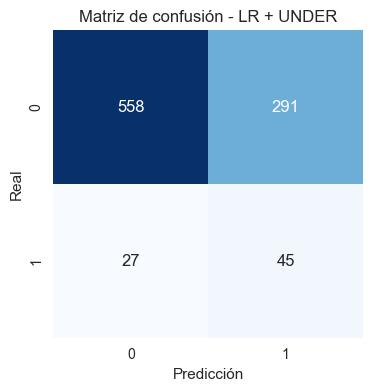

In [76]:
import joblib

clf = joblib.load('lr_pca25_under.pkl')

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de confusión - LR + UNDER")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


              precision    recall  f1-score   support

           0       0.96      0.68      0.79       849
           1       0.15      0.65      0.24        72

    accuracy                           0.68       921
   macro avg       0.55      0.67      0.52       921
weighted avg       0.89      0.68      0.75       921



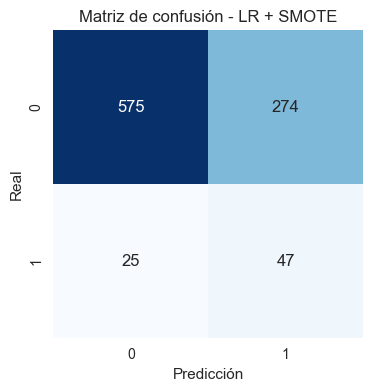

In [74]:
clf = joblib.load('lr_pca25_smote.pkl')

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de confusión - LR + SMOTE")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
